# Agrupamiento - K-Medias

Dataset:
El conjunto de datos ‚ÄúSeeds‚Äù describe 210 muestras de granos de trigo, cada una medida con 7 caracter√≠sticas.

Cada fila corresponde a un grano de trigo y se midieron variables de su geometr√≠a a partir de im√°genes escaneadas.

üîë Columnas del dataset



*   √Årea (A) ‚Üí √Årea de la semilla.
*   Per√≠metro (P) ‚Üí Longitud del contorno de la semilla.
*   Compacidad (C = 4œÄA / P¬≤) ‚Üí Qu√© tan ‚Äúcompacta‚Äù es la semilla (similar a circularidad).
*   Longitud del n√∫cleo (L) ‚Üí Largo del grano.
*   Ancho del n√∫cleo (W) ‚Üí Ancho del grano.
*   Coeficiente de asimetr√≠a (Asymmetry Coefficient) ‚Üí Medida de la simetr√≠a de la semilla.
*   Longitud del surco del n√∫cleo (Groove Length) ‚Üí Longitud del surco del grano.
*   Clase (label) ‚Üí Tipo de trigo (3 variedades distintas).

Para comenzar, ejecute la celda a continuaci√≥n para cargar nuestros datos.

> **Cita**: El conjunto de datos de semillas utilizado en este ejercicio fue publicado originalmente por el Instituto de Agrof√≠sica de la Academia Polaca de Ciencias en Lublin por Dua, D. y Graff, C. (2019) y puede descargarse del [Repositorio de Aprendizaje Autom√°tico de la UCI](http://archive.ics.uci.edu/ml), Universidad de California en Irvine, Facultad de Ciencias de la Informaci√≥n y la Computaci√≥n.

##Carga de dataset "Semillas"

In [1]:
import pandas as pd

# üì• Cargar el dataset Seeds desde un archivo CSV en internet
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

# üîé Seleccionar las primeras 6 columnas como caracter√≠sticas (sin incluir la clase)
# Estas columnas son las medidas de cada semilla (√°rea, per√≠metro, compacidad, etc.)
features = data[data.columns[0:6]]

# üé≤ Mostrar una muestra aleatoria de 10 semillas con sus caracter√≠sticas
features.sample(10)


--2025-10-18 21:40:25--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: ‚Äòseeds.csv‚Äô

seeds.csv           100%[===================>]   9.17K  --.-KB/s    in 0.001s  

2025-10-18 21:40:25 (17.5 MB/s) - ‚Äòseeds.csv‚Äô saved [9386/9386]



area  perimeter  compactness  kernel_length  kernel_width  \
197  13.37      13.78       0.8849          5.320         3.128   
68   14.37      14.39       0.8726          5.569         3.153   
105  18.83      16.29       0.8917          6.037         3.786   
34   15.05      14.68       0.8779          5.712         3.328   
180  11.41      12.95       0.8560          5.090         2.775   
149  10.79      12.93       0.8107          5.317         2.648   
202  11.18      12.72       0.8680          5.009         2.810   
73   19.11      16.26       0.9081          6.154         3.930   
173  11.40      13.08       0.8375          5.136         2.763   
170  11.02      13.00       0.8189          5.325         2.701   

     asymmetry_coefficient  
197                  4.670  
68                   1.464  
105                  2.553  
34                   2.129  
180                  4.957  
149                  5.462  
202                  4.051  
73                   2.936  
173                  5.588  
170                  6.735

from matplotlib import pyplot as plt
_df_0['area'].plot(kind='hist', bins=20, title='area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['perimeter'].plot(kind='hist', bins=20, title='perimeter')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['compactness'].plot(kind='hist', bins=20, title='compactness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['kernel_length'].plot(kind='hist', bins=20, title='kernel_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='area', y='perimeter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='perimeter', y='compactness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='compactness', y='kernel_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='kernel_length', y='kernel_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['area'].plot(kind='line', figsize=(8, 4), title='area')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['perimeter'].plot(kind='line', figsize=(8, 4), title='perimeter')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['compactness'].plot(kind='line', figsize=(8, 4), title='compactness')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['kernel_length'].plot(kind='line', figsize=(8, 4), title='kernel_length')
plt.gca().spines[['top', 'right']].set_visible(False)

##Normalizaci√≥n y Transformaci√≥n

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# ‚öñÔ∏è Normalizar las caracter√≠sticas num√©ricas
# MinMaxScaler lleva cada columna a un rango entre 0 y 1,
# para que todas las variables tengan la misma importancia en el an√°lisis.
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# üìâ Reducir la dimensionalidad con PCA (An√°lisis de Componentes Principales)
# n_components=2 significa que reduciremos los 6 atributos a 2 componentes principales
# Esto permite visualizar los datos en 2D sin perder demasiada informaci√≥n.
pca = PCA(n_components=2).fit(scaled_features)

# ‚ú® Transformar los datos escalados en el nuevo espacio de 2 componentes principales
features_2d = pca.transform(scaled_features)

# üëÄ Mostrar las 10 primeras semillas representadas en este espacio 2D
# Cada fila ahora tiene solo 2 valores (PC1 y PC2) en lugar de 6 atributos originales
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

## Agrupamiento de K-Medias

El algoritmo que utilizaremos para crear nuestros cl√∫steres de prueba es *K-Medias*. Este es un algoritmo de agrupamiento com√∫n que separa un conjunto de datos en *K* cl√∫steres de igual varianza. El n√∫mero de cl√∫steres, *K*, lo define el usuario. El algoritmo consta de los siguientes pasos:

1. Se selecciona aleatoriamente un conjunto de K centroides.
2. Los cl√∫steres se forman asignando los puntos de datos a su centroide m√°s cercano.
3. Se calcula la media de cada cl√∫ster y el centroide se desplaza hasta ella.
4. Los pasos 2 y 3 se repiten hasta que se cumple un criterio de parada. Normalmente, el algoritmo finaliza cuando cada nueva iteraci√≥n produce un movimiento insignificante de los centroides y los cl√∫steres se vuelven est√°ticos.
5. Cuando los cl√∫steres dejan de cambiar, el algoritmo ha *convergido*, definiendo sus ubicaciones. Tenga en cuenta que el punto de inicio aleatorio de los centroides implica que volver a ejecutar el algoritmo podr√≠a generar cl√∫steres ligeramente diferentes. Por lo tanto, el entrenamiento suele implicar m√∫ltiples iteraciones, reinicializando los centroides cada vez, y se selecciona el modelo con la mejor WCSS (suma de cuadrados dentro del cl√∫ster).

Intentemos usar K-Means en nuestros datos de semillas con un valor K de 3.

In [4]:
from sklearn.cluster import KMeans

# üß© Crear un modelo de K-Means con 3 centroides
# n_clusters=3 ‚Üí porque sabemos que existen 3 variedades de semillas de trigo
# init='k-means++' ‚Üí estrategia para inicializar los centroides de forma inteligente,
#                    evitando que caigan muy juntos y mejorando la convergencia.
# n_init=100 ‚Üí el algoritmo se ejecuta 100 veces con centroides iniciales diferentes
#              y se elige la mejor soluci√≥n (con menor inercia).
# max_iter=1000 ‚Üí n√∫mero m√°ximo de iteraciones por cada ejecuci√≥n.
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)

# ‚öôÔ∏è Ajustar el modelo a los datos (features) y predecir el cl√∫ster de cada semilla
# Esto significa que cada fila del dataset es asignada a un grupo (0, 1 o 2)
km_clusters = model.fit_predict(features.values)

# üëÄ Ver las asignaciones de cl√∫ster
# La salida ser√° un arreglo de n√∫meros (0, 1 o 2),
# indicando a qu√© grupo pertenece cada semilla.
km_clusters


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

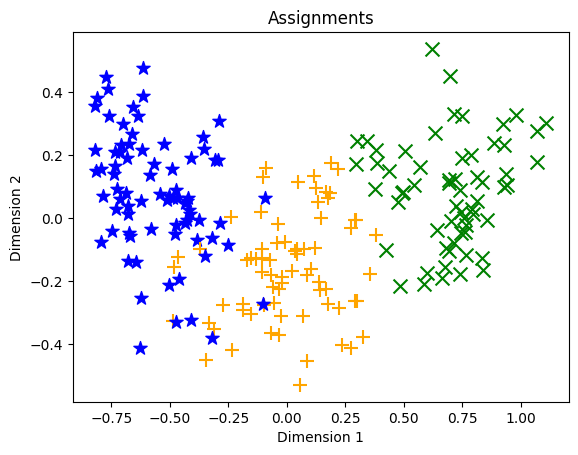

In [5]:
# ============================================================
# üìä VISUALIZACI√ìN DE CL√öSTERES CON K-MEANS
# ============================================================

# Importamos la librer√≠a para gr√°ficos
import matplotlib.pyplot as plt

# Esta l√≠nea es especial para Jupyter Notebook:
# asegura que los gr√°ficos se muestren justo debajo de la celda donde se ejecuta.
%matplotlib inline

# ------------------------------------------------------------
# Definimos una funci√≥n para graficar los cl√∫steres encontrados
# ------------------------------------------------------------
def plot_clusters(samples, clusters):
    # Diccionario que asigna un color a cada cl√∫ster
    col_dic = {0:'blue', 1:'green', 2:'orange'}
    # Diccionario que asigna un s√≠mbolo/forma a cada cl√∫ster
    mrk_dic = {0:'*', 1:'x', 2:'+'}

    # Crear una lista de colores seg√∫n el cl√∫ster asignado a cada semilla
    colors = [col_dic[x] for x in clusters]
    # Crear una lista de marcadores seg√∫n el cl√∫ster asignado a cada semilla
    markers = [mrk_dic[x] for x in clusters]

    # üîÑ Dibujar cada semilla en el plano 2D
    for sample in range(len(clusters)):
        plt.scatter(
            samples[sample][0],    # posici√≥n en el eje X (1er componente principal)
            samples[sample][1],    # posici√≥n en el eje Y (2do componente principal)
            color=colors[sample],  # color de acuerdo al cl√∫ster
            marker=markers[sample],# marcador de acuerdo al cl√∫ster
            s=100                  # tama√±o del punto
        )

    # Etiquetas de los ejes
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    # T√≠tulo del gr√°fico
    plt.title('Assignments')
    # Mostrar el gr√°fico final
    plt.show()

# ------------------------------------------------------------
# üöÄ Llamamos a la funci√≥n
# ------------------------------------------------------------
# - features_2d: coordenadas en 2D de cada semilla (tras aplicar PCA)
# - km_clusters: grupo asignado por K-Means a cada semilla
plot_clusters(features_2d, km_clusters)



Los datos deben separarse en tres grupos distintos. De lo contrario, repita los dos pasos anteriores.

¬øCu√°l es la utilidad pr√°ctica de la agrupaci√≥n en cl√∫steres? En algunos casos, tendr√° datos que necesita agrupar en grupos distintos sin saber cu√°ntos hay ni qu√© indican. Por ejemplo, una organizaci√≥n de marketing podr√≠a querer separar a los clientes en segmentos distintos y luego investigar c√≥mo esos segmentos muestran diferentes comportamientos de compra.

A veces, la agrupaci√≥n en cl√∫steres se utiliza como primer paso para crear un modelo de clasificaci√≥n. Se empieza por identificar grupos distintos de puntos de datos y luego se asignan etiquetas de clase a esos grupos. Despu√©s, se pueden usar estos datos etiquetados para entrenar un modelo de clasificaci√≥n.

En el caso de los datos de semillas, las diferentes especies de semillas ya se conocen y est√°n codificadas como 0 (*Kama*), 1 (*Rosa*) o 2 (*Canadian*), por lo que podemos usar estos identificadores para comparar las clasificaciones de especies con los grupos identificados por nuestro algoritmo no supervisado.

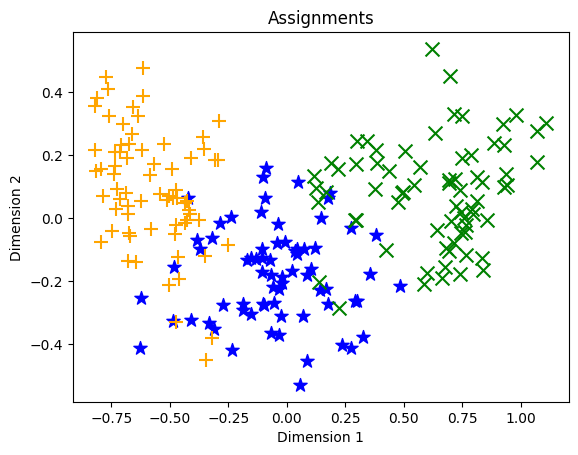

In [6]:
# ------------------------------------------------------------
# Extraer la columna con la especie real de cada semilla
# ------------------------------------------------------------
seed_species = data[data.columns[7]]
# - data.columns[7] ‚Üí corresponde a la columna "class" del dataset seeds.csv.
# - Esa columna indica la variedad real de trigo (3 clases distintas).
# - Guardamos esa informaci√≥n en la variable seed_species.

# ------------------------------------------------------------
# Graficar las semillas seg√∫n su especie real
# ------------------------------------------------------------
plot_clusters(features_2d, seed_species.values)
# - features_2d ‚Üí las semillas proyectadas en 2 dimensiones (con PCA).
# - seed_species.values ‚Üí la etiqueta real de cada semilla (1, 2 o 3).
#   üëâ Esto reemplaza los cl√∫steres predichos por K-Means.
#   üëâ El gr√°fico mostrar√° c√≥mo se distribuyen las especies reales en el plano 2D.


##Resultados

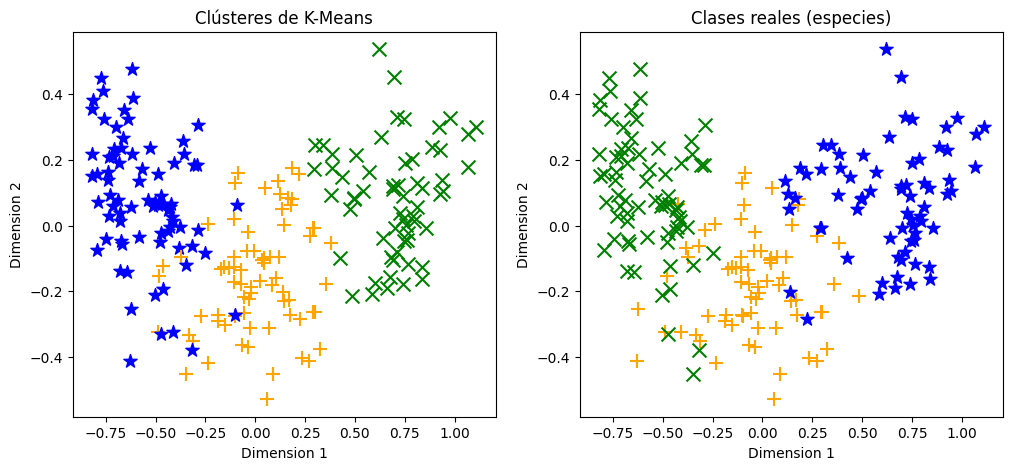

In [7]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Funci√≥n para graficar dos comparaciones lado a lado
# ------------------------------------------------------------
def compare_clusters(samples, km_clusters, true_labels):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas de gr√°ficos

    # Diccionario de colores (mismos en ambos gr√°ficos para comparar)
    col_dic = {0:'blue', 1:'green', 2:'orange'}
    mrk_dic = {0:'*', 1:'x', 2:'+'}

    # ----------- Gr√°fico 1: Asignaciones de K-Means -----------
    for sample in range(len(km_clusters)):
        axes[0].scatter(samples[sample, 0], samples[sample, 1],
                        color=col_dic[km_clusters[sample] % 3],  # usamos %3 para mapear colores
                        marker=mrk_dic[km_clusters[sample] % 3],
                        s=100)
    axes[0].set_title("Cl√∫steres de K-Means")
    axes[0].set_xlabel("Dimension 1")
    axes[0].set_ylabel("Dimension 2")

    # ----------- Gr√°fico 2: Clases reales -----------
    for sample in range(len(true_labels)):
        axes[1].scatter(samples[sample, 0], samples[sample, 1],
                        color=col_dic[(true_labels[sample]-1) % 3],  # -1 porque clases son 1,2,3
                        marker=mrk_dic[(true_labels[sample]-1) % 3],
                        s=100)
    axes[1].set_title("Clases reales (especies)")
    axes[1].set_xlabel("Dimension 1")
    axes[1].set_ylabel("Dimension 2")

    plt.show()

# üöÄ Llamar a la funci√≥n con:
# - features_2d: semillas en 2D (tras PCA)
# - km_clusters: grupos encontrados por K-Means
# - seed_species.values: etiquetas reales de las semillas
compare_clusters(features_2d, km_clusters, seed_species.values)


Puede haber algunas diferencias entre las asignaciones de grupos y las etiquetas de clase, pero el modelo K-Means deber√≠a haber hecho un trabajo razonable de agrupamiento de las observaciones de modo que las semillas de la misma especie est√©n generalmente en el mismo grupo.